In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

wy = 'wy2017'

nc_output = '/Volumes/G-SPEED Shuttle XL/wrf-30yr-daily/landmodel/' + wy + '/'

In [4]:
ds_land = xr.open_mfdataset(nc_output+'*.nc')

In [5]:
ds_land

,Array,Chunk
Bytes,143.04 MB,391.88 kB
Shape,"(365, 289, 339)","(1, 289, 339)"
Count,1095 Tasks,365 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,143.04 MB,391.88 kB
Shape,"(365, 289, 339)","(1, 289, 339)"
Count,1095 Tasks,365 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [8]:
# Note that although this is technically correct, because it's grouping it by month,
# month = 1 is now January 2017 while month = 10 is October 2016
sm_seasonal = ds_land['SMOIS_DM'].groupby('XTIME.month').mean()
sm_seasonal


<xarray.DataArray 'SMOIS_DM' (month: 12, soil_layers_stag: 4, south_north: 289, west_east: 339)>
dask.array<stack, shape=(12, 4, 289, 339), dtype=float32, chunksize=(1, 4, 289, 339), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: soil_layers_stag, south_north, west_east

In [20]:
sm_seasonal_surf = sm_seasonal.isel(soil_layers_stag=0)
sm_seasonal_surf

<xarray.DataArray 'SMOIS_DM' (month: 12, south_north: 289, west_east: 339)>
dask.array<getitem, shape=(12, 289, 339), dtype=float32, chunksize=(1, 289, 339), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: south_north, west_east

In [21]:
# TODO... use landmask to mask out water features as nan
sm_seasonal_surf = sm_seasonal_surf.where(sm_seasonal_surf<1.0,np.nan)

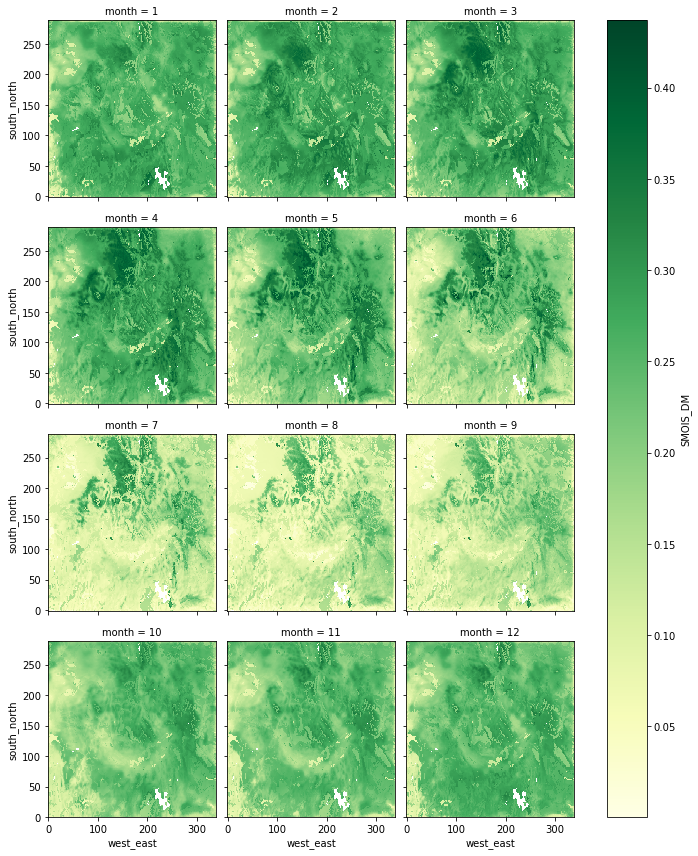

In [24]:
sm_seasonal_surf.plot(x='west_east',y='south_north',col="month",col_wrap=3,cmap='YlGn')

In [35]:
sm_seasonal_surf_av = sm_seasonal_surf.mean(dim=('west_east','south_north'))
sm_seasonal_surf_std = sm_seasonal_surf.std(dim=('west_east','south_north'))
sm_seasonal_surf_cv = sm_seasonal_surf_std / sm_seasonal_surf_av

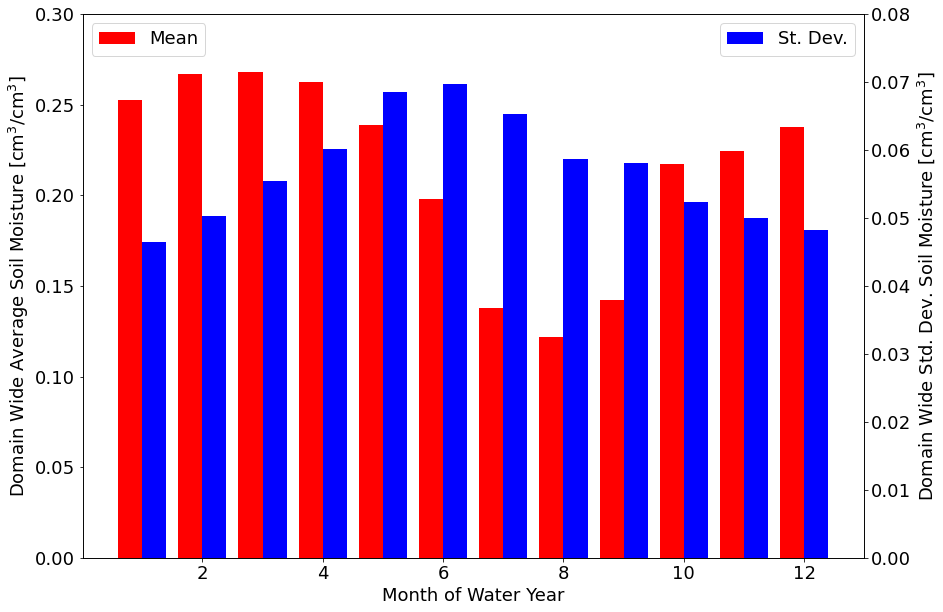

In [41]:
# TODO: Create month array for x plot
plt.rcParams.update({'font.size': 18})

fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(14)


ax.bar((np.arange(12)+1),sm_seasonal_surf_av, color='r', width=-0.4, align='edge',label='Mean')

ax.set_ylim([0.0,0.3])
ax.set_xlabel('Month of Water Year')
ax.set_ylabel('Domain Wide Average Soil Moisture [cm${}^3$/cm${}^3$]')

ax2 = ax.twinx()
ax2.bar((np.arange(12)+1),sm_seasonal_surf_std, color='b', width=0.4, align='edge',label='St. Dev.')
ax2.set_ylim([0.0,0.08])
ax2.set_ylabel('Domain Wide Std. Dev. Soil Moisture [cm${}^3$/cm${}^3$]')

ax.legend(loc=2)
ax2.legend(loc=1)